## Linear Regression

A statistical model that that examines the linear relationship between two (simple linear regression) or more (multiple linear regression) variables.

Linear regression performs the task to predict a **dependent variable** value `y` based on given **independent variable(s)** `x`. The relationship between `y` and `x` is represented by a linear equation.

$y \, = \, m_1*x_1 \, + ... + \, m_n*x_n \, + \, b$

![](https://faculty.elgin.edu/dkernler/statistics/ch04/images/slope-intercept.gif)

### Simple Linear Regression

Now, let's have an example on simple linear regression where the relationship between two continuous variables, `y` and `x` will be examined.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

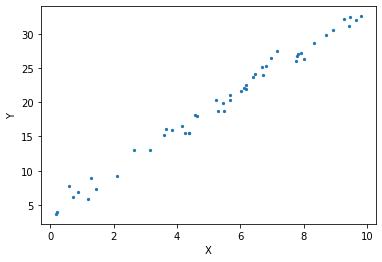

In [ ]:
num_sample = 50
m = 3
b = 4

# creating random samples
np.random.seed(0)
x = 10*np.random.rand(num_sample)
y = m*x + b + np.random.randn(num_sample)

plt.scatter(x, y, s=5)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Now, let's create the the regression line and plot it on the figure above.

In [ ]:
from ipywidgets import interact

In [ ]:
def plot_reg(m_reg, b_reg):
  num_sample = 50
  m = 3
  b = 4

  # creating random samples
  np.random.seed(0)
  x = 10*np.random.rand(num_sample)
  y = m*x + b + np.random.randn(num_sample)

  # regression line
  reg_line = m_reg*x + b_reg

  # plotting the regression line
  plt.plot(x, reg_line, c="red")
  plt.scatter(x, y, s=5)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.show()

interact(plot_reg, m_reg=2, b_reg=6)

interactive(children=(IntSlider(value=2, description='m_reg', max=6, min=-2), IntSlider(value=6, description='…

<function __main__.plot_reg>

With the help of the interactive plot above, we are able to observe how well our regression line fits to the data we have. However, we need a mathematical foundation to evaluate the resulting line.

R-squared is a goodness-of-fit measure for regression models. It represents the proportion of variance (of `y`) that has been explained by the independent variables in the model. The coefficient $R^2$ is defined as $1 - \frac{u}{v}$, where u is the residual sum of squares $\sum_i \, (y_{true_i} - y_{pred_i})^2$ and v is the total sum of squares $\sum_i \, (y_{true_i} - \mu_{y_{true}})^2$.


![](https://i2.wp.com/statisticsbyjim.com/wp-content/uploads/2017/04/residuals-300x186.png?resize=300%2C186)


Now, let's write a function to calculate the coefficient $R^2$. This function will take two parameters, namely *y_pred* and *y_true* and then calculate the $R^2$ as described above.

In [ ]:
def r2(y_true, y_pred):
  u = sum((y_true - y_pred)**2)
  v = sum((y_true - y_true.mean())**2)

  return 1-(u/v)

Next, let's put the resulting $R^2$ on top of the existing regression plot and see how it varies as we tweak the parameters.

In [ ]:
def plot_reg_R2(m_reg, b_reg):
  num_sample = 50
  m = 3
  b = 4

  # creating random samples
  np.random.seed(0)
  x = 10*np.random.rand(num_sample)
  y = m*x + b + np.random.randn(num_sample)

  # regression line
  reg_line = m_reg*x + b_reg

  # R2 calculation
  r2_coeff = r2(y, reg_line)

  # plotting the residuals
  for i in range(len(x)):
    plt.plot((x[i], x[i]), (reg_line[i], y[i]), 'b')

  # plotting the regression line
  plt.plot(x, reg_line, c="red")
  plt.scatter(x, y, s=10, marker="s", c="black")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title(r"$R^2: {:.2f}$".format(r2_coeff))
  plt.show()

interact(plot_reg_R2, m_reg=2, b_reg=6)

interactive(children=(IntSlider(value=2, description='m_reg', max=6, min=-2), IntSlider(value=6, description='…

<function __main__.plot_reg_R2>

### Weather Forecasting

The dataset contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunder storms or other poor weather conditions.

In this exercise, our goal is to predict the maximum temperature. First of all, we are going to consider the daily minimum temperature amount to predict the maximum temperature and then add further features to our input set.


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

path_prefix = "/content/drive/My Drive"

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from os.path import join

filename = "weather.csv"
df = pd.read_csv(join(path_prefix, filename))

In [ ]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# convert Precip column to numeric
df = df[df["Precip"] != "T"]
df["Precip"] = pd.to_numeric(df["Precip"])

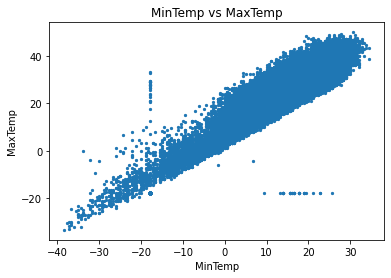

In [ ]:
df.plot.scatter(x="MinTemp", y="MaxTemp", s=5)  
plt.title("MinTemp vs MaxTemp")  
plt.xlabel("MinTemp")  
plt.ylabel("MaxTemp")  
plt.show()

In [ ]:
# extracting the input and output vectors
X = df['MinTemp'].values.reshape(-1,1)  # converting to column vector
y = df['MaxTemp'].values

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# creating the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# intercept
b = model.intercept_
# slope
m = model.coef_

print(m, b, sep="\n")

[0.92033997]
10.66185200865253


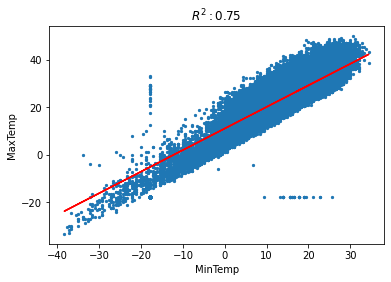

In [ ]:
# resulting regression line
rline = m[0]*X.flatten() + b

df.plot.scatter(x="MinTemp", y="MaxTemp", s=5)
plt.plot(X.flatten(), rline, c="red")
plt.title(r"$R^2: {:.2f}$".format(r2(y, rline)))  
plt.xlabel("MinTemp")  
plt.ylabel("MaxTemp")  
plt.show()

### Multiple Linear Regression

In simple linear regression, we have a single predictor
variable `x` which is used to model the response variable `y`. In many applications, there are more than one factor that influences the response. Multiple regression models
thus describe how a single response variable `y` depends linearly on a number of predictor variables.

<img src="https://i0.wp.com/brokerstir.com/wp-content/uploads/2018/04/multiple_linear2.png" height="180" width="420"></img>

Now, let's add further features to the model and observe how our results will change.


In [ ]:
# extracting the input and output vectors
# MinTemp: Min Temperature
# Precip: Precipitation
# DA: day (a silly variable)
features = ["MinTemp", "Precip", "DA"]
X = df[features].values  # converting to column vector
y = df['MaxTemp'].values

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# creating the model
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# let's have a look at the coefficients, 
# i.e m values
coeff_df = pd.DataFrame(model.coef_, features, columns=['Coefficient'])  
coeff_df

,Coefficient
MinTemp,0.917836
Precip,-0.067535
DA,-0.003597


### Evalution Metrics

*MSE (mean squared error)*: $\frac{1}{N}\sum_i \, (y_{true_i} - y_{pred_i})^2 \,$


*RMSE (root mean squared error)*: $\sqrt{\frac{1}{N}\sum_i \, (y_{true_i} - y_{pred_i})^2}$


*MAE (mean absolute error)*: $\frac{1}{N} \sum_i \, |y_{true_i} - y_{pred_i}| \,$

Since we are measuring the errors, we want to **minimize** these metrics.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))

mse: 17.813236137231044
mae: 3.217325709365243
rmse: 4.220572963145057


## Regression with Other Algorithms

So far, we have been mostly dealing with classification. And as a result, only talked about the classification aspect of the algorithms. However, it's possible to perform regression with kNN, Decision Trees and Random Forests. All we have to do is to import the correct model name.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# import models
knn = KNeighborsRegressor(2)
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=50)

# train as usual
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Let's just check the performance of random forest model.

In [ ]:
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))

mse: 14.458316240989053
mae: 2.7786176453840215
rmse: 3.802409267949605
